In [1]:
import uproot
import matplotlib
import matplotlib.pyplot as plt
import awkward as ak
import hist
import numpy as np
from event_display import gdml_read_ecal_info
import os

%matplotlib inline
matplotlib.rc("figure", dpi=200)

dir_path = os.path.dirname(os.path.realpath("__file__"))
dir_path

'/home/romanov/eic/kak-bog-cherepahu/simulation'

In [2]:
# Load geometry file
ecal_info = gdml_read_ecal_info(f"{dir_path}/wall_only.gdml")

# ecal_info is of EcalGeoInfo class, which is a helper holding information
# about all needed ecal geometries.
# Print what information it holds:
ecal_info.print()

# Data file name
#data_file_name = f"{dir_path}/data/test_gun.edm4hep.root"
#data_file_name = f"{dir_path}/../disk_gun_electrons_0-15GeV_100000ev.edm4hep.root"
#data_file_name = f"{dir_path}/../2022-11-22_pgun_pi-_wall_only_e0.01-30GeV_alldir_1prt_100evt.edm4hep.root"

module_size_x    : 2.0
module_size_y    : 2.0
module_size_z    : 20.0
total_modules    : 169
num_modules_x    : 13
num_modules_y    : 13
min_x            : -12.299999999999999
max_x            : 12.299999999999999
min_y            : -12.299999999999999
max_y            : 12.299999999999999
min_z            : 0.0
max_z            : 0.0
border_left      : -13.299999999999999
border_right     : 13.299999999999999
border_top       : 13.299999999999999
border_bottom    : -13.299999999999999
unit             : cm


In [3]:
data_file_name = f"/home/romanov/eic/kak-bog-cherepahu/glass-prototype/cmake-build-debug/output/SciGlass-4-1-L-13x13-20x20x200mm-1.5GeV-10000events-e--40mm-R1450.root"
# Open root file and get "events" tree from it
tree = uproot.open(data_file_name)["tree_crystals"]

# Number of events to process:
entry_start = 0                  # (!) Try changing those
entry_stop = 100000                # <==

def get_flatten_branch_data(branch_name):
    """ Simple helper function to read events and flatten the results"""
    data = tree[branch_name].array(entry_start=entry_start, entry_stop=entry_stop)
    data = ak.flatten(data).to_numpy()
    return data

def plot_branch_h1(branch_name, title, ax, bins, limit, mask=None):
    """ Helper plots 1d histogram by branch name. Data gets flatten in process"""
    data = get_flatten_branch_data(branch_name)
    if mask is not None:
        data = data[mask]
    hst_1d = hist.Hist(hist.axis.Regular(bins=bins, start=limit[0], stop=limit[1], name=title))
    hst_1d.fill(data)
    return hst_1d,hst_1d.plot(ax=ax)


# Read energies, x and y positions
# Flatten arrays for simplicity
energies = get_flatten_branch_data('edep')
# hits_x = get_flatten_branch_data('WallECalHits/WallECalHits.position.x')
# hits_y = get_flatten_branch_data('WallECalHits/WallECalHits.position.y')

In [4]:
# Uncomment this to see all values:
#tree.show()

names = [key for key in tree.keys()]
names


['edep']

In [5]:
module_de_flat = tree['edep'].array(entry_start=entry_start, entry_stop=entry_stop).to_numpy()

In [6]:
#ak.sum(energies)

module_de = np.reshape(module_de_flat, (len(module_de_flat), 13, 13))


In [7]:
np.shape(module_de)

(10000, 13, 13)

In [8]:
module_de[0]

array([[0.00000000e+00, 5.10998910e-01, 1.13569926e-01, 0.00000000e+00,
        0.00000000e+00, 1.66881391e-01, 1.48138729e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 2.10438345e+00, 0.00000000e+00,
        7.65473713e-01, 3.86415714e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.81592882e-02,
        0.00000000e+00, 9.09282344e-01, 2.20376023e-01, 0.00000000e+00,
        1.47066894e-01, 2.79568109e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.25253690e+00, 0.00000000e+00,
        5.06692656e-01, 5.08290857e-01, 3.30278374e-01, 7.38140158e-01,
        1.61806634e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+

In [9]:
#from event_display import print_tabled_event

#print_tabled_event(module_de[0])

(<Figure size 1200x800 with 2 Axes>, <AxesSubplot:>)

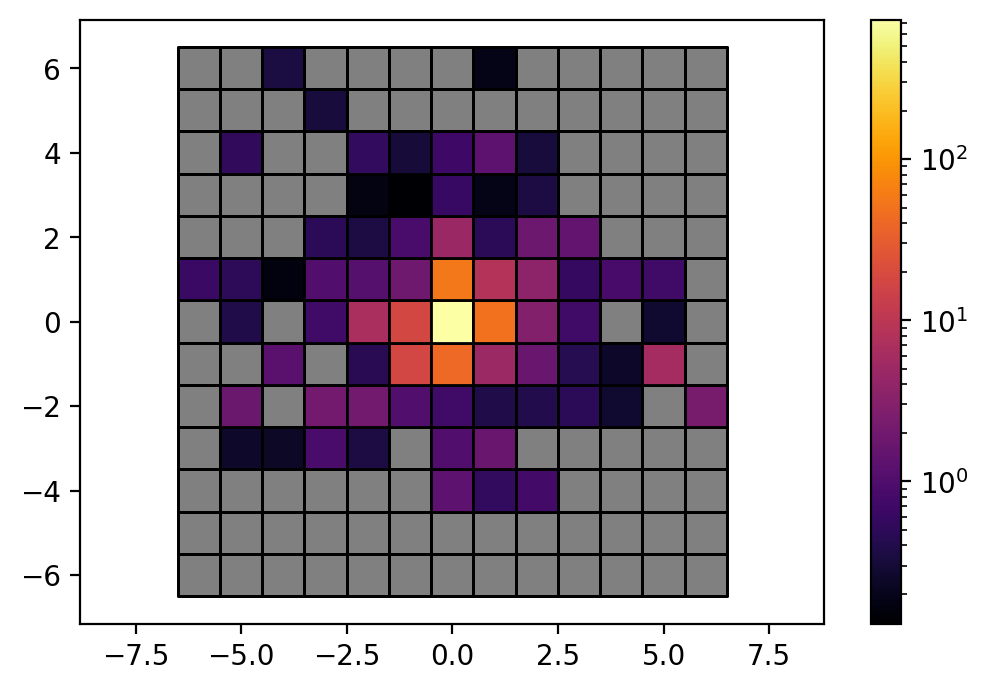

In [13]:
from event_display import table_display

table_display(module_de[3], cal_size=13, value_is_arr=False)

In [16]:
np.shape( np.sum(module_de_flat, axis=1))

(10000,)

In [17]:
sum_energies = np.sum(module_de_flat, axis=1)

In [21]:
def read_modules_de(file_name, entry_start = 0, entry_stop = 100000):
    tree = uproot.open(data_file_name)["tree_crystals"]
    module_de_flat = tree['edep'].array(entry_start=entry_start, entry_stop=entry_stop).to_numpy()
    return module_de_flat


In [26]:
pi_de_flat = read_modules_de("/home/romanov/eic/kak-bog-cherepahu/glass-prototype/cmake-build-debug/output/SciGlass-4-1-L-13x13-20x20x200mm-1.5GeV-10000events-pi--40mm-R1450.root")

In [1]:
pi_sum_e = np.sum(pi_de_flat, axis=1)

NameError: name 'np' is not defined

(array([  2.,   1.,   0.,   1.,   1.,   3.,   2.,   4.,   5.,   3.,   7.,
          6.,   9.,   4.,  17.,  11.,  15.,  27.,  24.,  29.,  24.,  30.,
         40.,  43.,  57.,  72.,  89.,  86., 117., 136., 189., 212., 254.,
        308., 372., 450., 507., 553., 641., 741., 780., 883., 861., 753.,
        619., 487., 322., 135.,  58.,  10.]),
 array([0.06720749, 0.08476655, 0.1023256 , 0.11988465, 0.1374437 ,
        0.15500275, 0.17256181, 0.19012086, 0.20767991, 0.22523896,
        0.24279802, 0.26035707, 0.27791612, 0.29547517, 0.31303422,
        0.33059328, 0.34815233, 0.36571138, 0.38327043, 0.40082949,
        0.41838854, 0.43594759, 0.45350664, 0.47106569, 0.48862475,
        0.5061838 , 0.52374285, 0.5413019 , 0.55886096, 0.57642001,
        0.59397906, 0.61153811, 0.62909716, 0.64665622, 0.66421527,
        0.68177432, 0.69933337, 0.71689243, 0.73445148, 0.75201053,
        0.76956958, 0.78712863, 0.80468769, 0.82224674, 0.83980579,
        0.85736484, 0.8749239 , 0.89248295, 0.

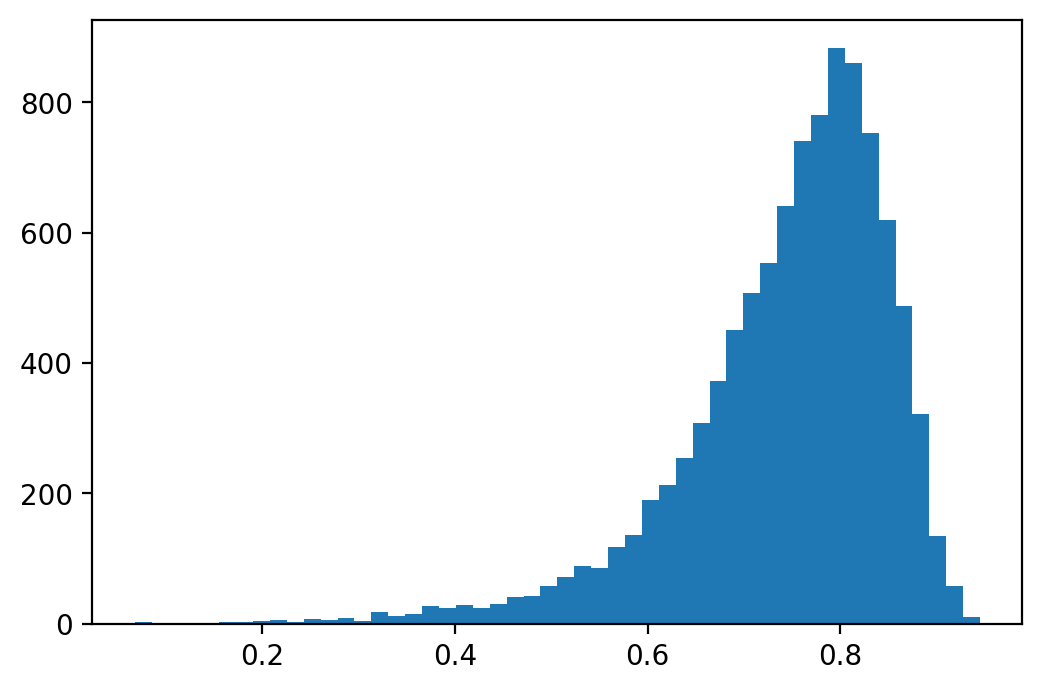

In [28]:
fig, axs = plt.subplots()

# We can set the number of bins with the *bins* keyword argument.
axs.hist(pi_sum_e/1500, bins=50)

(array([  2.,   1.,   0.,   1.,   1.,   3.,   2.,   4.,   5.,   3.,   7.,
          6.,   9.,   4.,  17.,  11.,  15.,  27.,  24.,  29.,  24.,  30.,
         40.,  43.,  57.,  72.,  89.,  86., 117., 136., 189., 212., 254.,
        308., 372., 450., 507., 553., 641., 741., 780., 883., 861., 753.,
        619., 487., 322., 135.,  58.,  10.]),
 array([0.06720749, 0.08476655, 0.1023256 , 0.11988465, 0.1374437 ,
        0.15500275, 0.17256181, 0.19012086, 0.20767991, 0.22523896,
        0.24279802, 0.26035707, 0.27791612, 0.29547517, 0.31303422,
        0.33059328, 0.34815233, 0.36571138, 0.38327043, 0.40082949,
        0.41838854, 0.43594759, 0.45350664, 0.47106569, 0.48862475,
        0.5061838 , 0.52374285, 0.5413019 , 0.55886096, 0.57642001,
        0.59397906, 0.61153811, 0.62909716, 0.64665622, 0.66421527,
        0.68177432, 0.69933337, 0.71689243, 0.73445148, 0.75201053,
        0.76956958, 0.78712863, 0.80468769, 0.82224674, 0.83980579,
        0.85736484, 0.8749239 , 0.89248295, 0.

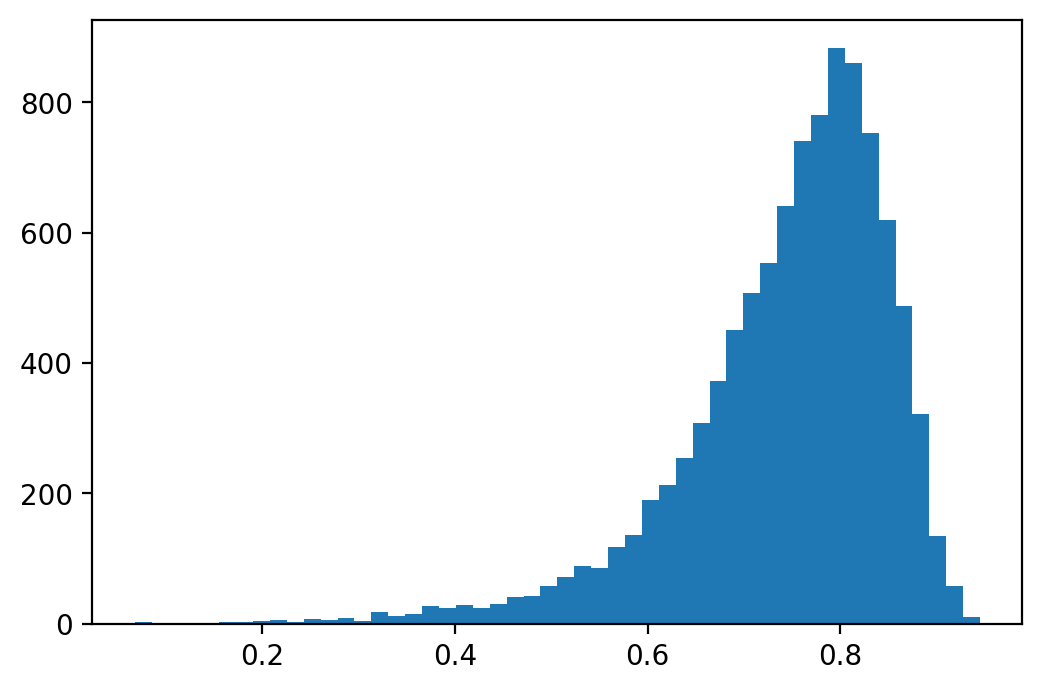

In [29]:
fig, axs = plt.subplots()

# We can set the number of bins with the *bins* keyword argument.
axs.hist(sum_energies/1500, bins=50)


In [ ]:
# Build the histogram
# noinspection PyTypeChecker
hits_h2d = hist.Hist(
    hist.axis.Regular(bins=69, start=-700, stop=700, name="x"),
    hist.axis.Regular(bins=69, start=-700, stop=700, name="y"),)

hits_h2d.fill(hits_x, hits_y)

fig, ax = plt.subplots(figsize=(5,5))
ax.autoscale()
ax.axis('equal')
hits_h2d.plot2d(ax=ax)

In [ ]:
# Read true particle momentums
generatorStatus = get_flatten_branch_data('MCParticles/MCParticles.generatorStatus')
stable_only = generatorStatus > 0
# Fill histograms
fig, axs = plt.subplots(1,3, figsize=(8,2))

plot_branch_h1('MCParticles/MCParticles.momentum.x', 'px', axs[0], 100, (-1,1), stable_only)
plot_branch_h1('MCParticles/MCParticles.momentum.y', 'py', axs[1], 100, (-1,1), stable_only)
plot_branch_h1('MCParticles/MCParticles.momentum.z', 'pz', axs[2], 100, (1, 20), stable_only)

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(8,2))
plot_branch_h1('MCParticles/MCParticles.vertex.x', 'vtx_x', axs[0], 100, (-600,600), stable_only)
plot_branch_h1('MCParticles/MCParticles.vertex.y', 'vtx_y', axs[1], 100, (-600,600), stable_only)
plot_branch_h1('MCParticles/MCParticles.vertex.z', 'vtx_z', axs[2], 100, (-2000,1800), stable_only)

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(9,2))
plot_branch_h1('MCParticles/MCParticles.endpoint.x', 'endpoint x', axs[0], 100, (-200,200), stable_only)
plot_branch_h1('MCParticles/MCParticles.endpoint.y', 'endpoint y', axs[1], 100, (-200,200), stable_only)
plot_branch_h1('MCParticles/MCParticles.endpoint.z', 'endpoint z', axs[2], 100, (0, 2000), stable_only)

In [ ]:
fig, ax = plt.subplots(figsize=(5,4))
plot_branch_h1('MCParticles/MCParticles.endpoint.z', 'endpoint z', ax, 200, (0,500), stable_only)

In [ ]:
fig, ax = plt.subplots(figsize=(5, 4))
plot_branch_h1('MCParticles/MCParticles.endpoint.z', 'endpoint z', ax, 200, (-2100, -1900), stable_only)

In [ ]:
vtx_x = tree['MCParticles/MCParticles.vertex.x'].array(entry_start=entry_start, entry_stop=entry_stop)